In [240]:
# About: Using ball by ball IPL data to find out what Suryakumar Yadav's secret to success is, 
# Does he do well against spin ? Does he struggle against a certain type of bowling ?
# How do the top ipl spinners fared against him in comaprison to other IPL batters ?
# Which batter favours facing which type of bowling ?
# All of these questions have been answered in this Analysis Feature.

In [241]:
#importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [242]:
#accessing data
df=pd.read_csv('all_matches.csv')

In [243]:
#pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [244]:
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [245]:
filt1 =(df['innings']==1) | (df['innings']==2)

#we need only innings 1 & 2 data , not super over data

In [246]:
df=df[filt1]

In [247]:
spin=['Rashid Khan','RA Jadeja','SP Narine','R Ashwin','YS Chahal','AR Patel']
#the top 6 spinners of the ipl (2014-2023)

In [248]:
filt2=(df['striker']=='SA Yadav') & (df['bowler'].isin(spin))

In [249]:
outs=['caught','bowled','lbw','stumped','caught and bowled','hit wicket']

In [250]:
year=[2014,2015,2016,2017,2018,2019,'2019','2020/21','2021',2021,2022,2023,'2018']

In [251]:
filt7=(df['wicket_type'].isin(outs)) & (df['season'].isin(year)) 


In [252]:
df.season.unique()

array(['2007/08', '2009', '2009/10', '2011', '2012', 2012, 2013, 2014,
       2015, 2016, 2017, 2019, 2018, '2018', '2019', '2020/21', '2021',
       2021, 2022, 2023], dtype=object)

In [253]:
df.wicket_type.unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field', 'retired out'], dtype=object)

In [254]:
df[df['striker']=='SA Yadav'].runs_off_bat.sum(),df[df['striker']=='SA Yadav'].ball.count()

(3249, 2312)

In [255]:
100*(df[df['striker']=='SA Yadav'].runs_off_bat.sum()/df[df['striker']=='SA Yadav'].ball.count())

140.52768166089967

In [256]:
df[df['striker']=='SA Yadav'].runs_off_bat.sum()/df[(df['striker']=='SA Yadav') & 
df['wicket_type'].isin(outs)]['wicket_type'].count()

33.49484536082474

In [257]:
#Suryakumar Yadav has played for KKR(2014-2017) & MI(2018-2023) and has scored 3249 runs @SR=140.53 & Average=33.49 

In [258]:
sky_df=df[filt2]

In [259]:
sky_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
97040,729299,2014,2014-04-24,Sharjah Cricket Stadium,1,15.4,Kolkata Knight Riders,Royal Challengers Bangalore,SA Yadav,RV Uthappa,YS Chahal,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97041,729299,2014,2014-04-24,Sharjah Cricket Stadium,1,15.5,Kolkata Knight Riders,Royal Challengers Bangalore,SA Yadav,RV Uthappa,YS Chahal,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97877,729307,2014,2014-04-26,Sheikh Zayed Stadium,2,13.1,Kolkata Knight Riders,Kings XI Punjab,SA Yadav,PP Chawla,AR Patel,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97879,729307,2014,2014-04-26,Sheikh Zayed Stadium,2,13.3,Kolkata Knight Riders,Kings XI Punjab,SA Yadav,PP Chawla,AR Patel,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97882,729307,2014,2014-04-26,Sheikh Zayed Stadium,2,13.6,Kolkata Knight Riders,Kings XI Punjab,SA Yadav,SP Narine,AR Patel,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [260]:
len(sky_df)

386

In [261]:
sum(sky_df['runs_off_bat'])

445

In [262]:
len(sky_df)-6

380

In [263]:
filt3=sky_df['player_dismissed']=='SA Yadav'

In [264]:
len(sky_df[filt3])

7

In [265]:
sr_all_spin=sum(sky_df['runs_off_bat'])/(len(sky_df))

In [266]:
sr_all_spin*100

115.28497409326425

In [267]:
#SKY has scored 445 runs off 380 balls @SR=115.28 against the top 6 spinners of the IPL during (2014-2023).
#The spinners are Rashid Khan,Ravindra Jadeja,Ravichandran Ashwin,Sunil Narine,Yuzvendra Chahal & Axar Patel.

In [268]:
filt_rashid=sky_df['bowler']=='Rashid Khan'
filt_jaddu=sky_df['bowler']=='RA Jadeja'
filt_ashwin=sky_df['bowler']=='R Ashwin'
filt_narine=sky_df['bowler']=='SP Narine'
filt_axar=sky_df['bowler']=='AR Patel'
filt_chahal=sky_df['bowler']=='YS Chahal'


In [269]:
sr_rashid=sum(sky_df[filt_rashid]['runs_off_bat'])/len(sky_df[filt_rashid])*100

In [270]:
sr_jaddu=sum(sky_df[filt_jaddu]['runs_off_bat'])/len(sky_df[filt_jaddu])*100
sr_ashwin=sum(sky_df[filt_ashwin]['runs_off_bat'])/len(sky_df[filt_ashwin])*100
sr_narine=sum(sky_df[filt_narine]['runs_off_bat'])/len(sky_df[filt_narine])*100
sr_axar=sum(sky_df[filt_axar]['runs_off_bat'])/len(sky_df[filt_axar])*100
sr_chahal=sum(sky_df[filt_chahal]['runs_off_bat'])/len(sky_df[filt_chahal])*100

In [271]:
(sr_rashid,sr_jaddu,sr_ashwin,sr_narine,sr_axar,sr_chahal)
#His strike rate individually against these 6 spinners: Rashid Khan, Ravindra Jadeja, Ravichandran Ashwin, Sunil Narine, 
#Axar Patel, Yuzvendra Chahal

(148.27586206896552,
 75.0,
 140.2439024390244,
 116.66666666666667,
 86.88524590163934,
 116.90140845070422)

In [272]:
filt4= (df['bowler'].isin(spin))

In [273]:
spin_df=df[filt4]

In [274]:
spin_df.head(10)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
9086,336023,2007/08,2008-05-17,Sawai Mansingh Stadium,2,17.1,Royal Challengers Bangalore,Rajasthan Royals,A Kumble,R Dravid,RA Jadeja,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9087,336023,2007/08,2008-05-17,Sawai Mansingh Stadium,2,17.2,Royal Challengers Bangalore,Rajasthan Royals,A Kumble,R Dravid,RA Jadeja,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9088,336023,2007/08,2008-05-17,Sawai Mansingh Stadium,2,17.3,Royal Challengers Bangalore,Rajasthan Royals,R Dravid,A Kumble,RA Jadeja,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9089,336023,2007/08,2008-05-17,Sawai Mansingh Stadium,2,17.4,Royal Challengers Bangalore,Rajasthan Royals,A Kumble,R Dravid,RA Jadeja,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9090,336023,2007/08,2008-05-17,Sawai Mansingh Stadium,2,17.5,Royal Challengers Bangalore,Rajasthan Royals,R Dravid,A Kumble,RA Jadeja,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9091,336023,2007/08,2008-05-17,Sawai Mansingh Stadium,2,17.6,Royal Challengers Bangalore,Rajasthan Royals,R Dravid,A Kumble,RA Jadeja,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9098,336023,2007/08,2008-05-17,Sawai Mansingh Stadium,2,19.1,Royal Challengers Bangalore,Rajasthan Royals,R Dravid,Abdur Razzak,RA Jadeja,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9099,336023,2007/08,2008-05-17,Sawai Mansingh Stadium,2,19.2,Royal Challengers Bangalore,Rajasthan Royals,R Dravid,Abdur Razzak,RA Jadeja,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9100,336023,2007/08,2008-05-17,Sawai Mansingh Stadium,2,19.3,Royal Challengers Bangalore,Rajasthan Royals,R Dravid,Abdur Razzak,RA Jadeja,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9101,336023,2007/08,2008-05-17,Sawai Mansingh Stadium,2,19.4,Royal Challengers Bangalore,Rajasthan Royals,R Dravid,Abdur Razzak,RA Jadeja,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [275]:
x=spin_df.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending=False)

In [276]:
y=spin_df.groupby(['striker'])['ball'].count().sort_values(ascending=False)

In [277]:
sr_spin=(x/y)*100

In [278]:
x=pd.DataFrame(x).reset_index()
y=pd.DataFrame(y).reset_index()

In [279]:
x.head()

,striker,runs_off_bat
0,DA Warner,663
1,V Kohli,560
2,S Dhawan,475
3,SA Yadav,445
4,RG Sharma,436


In [280]:
y.head()

,striker,ball
0,V Kohli,511
1,DA Warner,454
2,RG Sharma,449
3,S Dhawan,426
4,SA Yadav,386


In [281]:
x.head()

,striker,runs_off_bat
0,DA Warner,663
1,V Kohli,560
2,S Dhawan,475
3,SA Yadav,445
4,RG Sharma,436


In [282]:
x.set_index('striker',inplace=True)

In [283]:
x.head()

,runs_off_bat
striker,
DA Warner,663
V Kohli,560
S Dhawan,475
SA Yadav,445
RG Sharma,436


In [284]:
spin_search=x.merge(y,on='striker',how='left')

In [285]:
spin_search.head()

,striker,runs_off_bat,ball
0,DA Warner,663,454
1,V Kohli,560,511
2,S Dhawan,475,426
3,SA Yadav,445,386
4,RG Sharma,436,449


In [286]:
filt5=spin_search['ball']>=80

In [287]:
spin_search=spin_search[filt5]

In [288]:
spin_search.head()

,striker,runs_off_bat,ball
0,DA Warner,663,454
1,V Kohli,560,511
2,S Dhawan,475,426
3,SA Yadav,445,386
4,RG Sharma,436,449


In [289]:
spin_search.set_index('striker',inplace=True)

In [290]:
spin_search.reset_index()

,striker,runs_off_bat,ball
0,DA Warner,663,454
1,V Kohli,560,511
2,S Dhawan,475,426
3,SA Yadav,445,386
4,RG Sharma,436,449
...,...,...,...
68,NV Ojha,92,107
69,M Vijay,82,90
70,MEK Hussey,80,80
71,EJG Morgan,79,92


In [291]:
x.head()

,runs_off_bat
striker,
DA Warner,663
V Kohli,560
S Dhawan,475
SA Yadav,445
RG Sharma,436


In [292]:
x=spin_df.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending=False)

In [293]:
x=pd.DataFrame(x)

In [294]:
x.head()

,runs_off_bat
striker,
DA Warner,663
V Kohli,560
S Dhawan,475
SA Yadav,445
RG Sharma,436


In [295]:
spin_search=x.merge(y,on='striker')

In [296]:
spin_search['sr']=100*(spin_search['runs_off_bat']/spin_search['ball'])

In [297]:
spin_search.head()
#how all batters have fared against these spinners 

,striker,runs_off_bat,ball,sr
0,DA Warner,663,454,146.035242
1,V Kohli,560,511,109.589041
2,S Dhawan,475,426,111.502347
3,SA Yadav,445,386,115.284974
4,RG Sharma,436,449,97.104677


In [298]:
spin_search.set_index('striker',inplace=True)

In [299]:
spin_search.sort_values(by='sr',ascending=False,inplace=True)

In [300]:
spin_search.head(10)

,runs_off_bat,ball,sr
striker,,,
Avesh Khan,18,5,360.000000
MJ McClenaghan,18,5,360.000000
BA Bhatt,6,2,300.000000
ER Dwivedi,5,2,250.000000
Rahmanullah Gurbaz,30,12,250.000000
KC Cariappa,9,4,225.000000
TK Curran,27,12,225.000000
KS Bharat,33,15,220.000000
AJ Tye,15,7,214.285714


In [301]:
filt5=spin_search['ball']>=80

In [302]:
spin_search=spin_search[filt5]

In [303]:
spin_search.head()

,runs_off_bat,ball,sr
striker,,,
Abhishek Sharma,154,98,157.142857
PP Shaw,156,102,152.941176
DA Warner,663,454,146.035242
AD Russell,195,134,145.522388
DR Smith,181,125,144.800000


In [304]:
spin_search.reset_index(inplace=True)

In [305]:
count=0
for i in range(len(spin_search)):
    if(spin_search['striker'][i])=='SA Yadav':
        break
    else:
        count+=1
print(count,' ',spin_search['striker'][i]," ",len(spin_search))        
#Suryakumar Yadav ranks 39th among the 74 batters to have faced atleast 80 balls from these spinners        

38   SA Yadav   73


In [306]:
spin_search

,striker,runs_off_bat,ball,sr
0,Abhishek Sharma,154,98,157.142857
1,PP Shaw,156,102,152.941176
2,DA Warner,663,454,146.035242
3,AD Russell,195,134,145.522388
4,DR Smith,181,125,144.800000
...,...,...,...,...
68,M Vijay,82,90,91.111111
69,BB McCullum,122,140,87.142857
70,NV Ojha,92,107,85.981308
71,EJG Morgan,79,92,85.869565


In [307]:
rashid_df=df[df['bowler']=='Rashid Khan']
jaddu_df=df[df['bowler']=='RA Jadeja']
ashwin_df=df[df['bowler']=='R Ashwin']
narine_df=df[df['bowler']=='SP Narine']
axar_df=df[df['bowler']=='AR Patel']
chahal_df=df[df['bowler']=='YS Chahal']

In [308]:
axar_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
95025,729283,2014,2014-04-18,Sheikh Zayed Stadium,1,0.1,Chennai Super Kings,Kings XI Punjab,DR Smith,BB McCullum,AR Patel,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95026,729283,2014,2014-04-18,Sheikh Zayed Stadium,1,0.2,Chennai Super Kings,Kings XI Punjab,BB McCullum,DR Smith,AR Patel,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95027,729283,2014,2014-04-18,Sheikh Zayed Stadium,1,0.3,Chennai Super Kings,Kings XI Punjab,BB McCullum,DR Smith,AR Patel,0,5,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95028,729283,2014,2014-04-18,Sheikh Zayed Stadium,1,0.4,Chennai Super Kings,Kings XI Punjab,BB McCullum,DR Smith,AR Patel,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95029,729283,2014,2014-04-18,Sheikh Zayed Stadium,1,0.5,Chennai Super Kings,Kings XI Punjab,BB McCullum,DR Smith,AR Patel,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [309]:
runs_rashid=pd.DataFrame(rashid_df.groupby(['striker'])['runs_off_bat'].sum())
runs_jaddu=pd.DataFrame(jaddu_df.groupby(['striker'])['runs_off_bat'].sum())
runs_ashwin=pd.DataFrame(ashwin_df.groupby(['striker'])['runs_off_bat'].sum())
runs_narine=pd.DataFrame(narine_df.groupby(['striker'])['runs_off_bat'].sum())
runs_axar=pd.DataFrame(axar_df.groupby(['striker'])['runs_off_bat'].sum())
runs_chahal=pd.DataFrame(chahal_df.groupby(['striker'])['runs_off_bat'].sum())

In [310]:
balls_rashid=pd.DataFrame(rashid_df.groupby(['striker'])['ball'].count())
balls_jaddu=pd.DataFrame(jaddu_df.groupby(['striker'])['ball'].count())
balls_ashwin=pd.DataFrame(ashwin_df.groupby(['striker'])['ball'].count())
balls_narine=pd.DataFrame(narine_df.groupby(['striker'])['ball'].count())
balls_axar=pd.DataFrame(axar_df.groupby(['striker'])['ball'].count())
balls_chahal=pd.DataFrame(chahal_df.groupby(['striker'])['ball'].count())

In [311]:
batters_agst_rashid=runs_rashid.merge(balls_rashid,on='striker')
batters_agst_jaddu=runs_jaddu.merge(balls_jaddu,on='striker')
batters_agst_ashwin=runs_ashwin.merge(balls_ashwin,on='striker')
batters_agst_narine=runs_narine.merge(balls_narine,on='striker')
batters_agst_axar=runs_axar.merge(balls_axar,on='striker')
batters_agst_chahal=runs_chahal.merge(balls_chahal,on='striker')

In [312]:
batters_agst_rashid['sr']=100*(batters_agst_rashid['runs_off_bat']/batters_agst_rashid['ball'])
batters_agst_jaddu['sr']=100*(batters_agst_jaddu['runs_off_bat']/batters_agst_jaddu['ball'])
batters_agst_ashwin['sr']=100*(batters_agst_ashwin['runs_off_bat']/batters_agst_ashwin['ball'])
batters_agst_narine['sr']=100*(batters_agst_narine['runs_off_bat']/batters_agst_narine['ball'])
batters_agst_axar['sr']=100*(batters_agst_axar['runs_off_bat']/batters_agst_axar['ball'])
batters_agst_chahal['sr']=100*(batters_agst_chahal['runs_off_bat']/batters_agst_chahal['ball'])

In [313]:
batters_agst_rashid.sort_values(by='sr',inplace=True,ascending=False)
batters_agst_jaddu.sort_values(by='sr',inplace=True,ascending=False)
batters_agst_ashwin.sort_values(by='sr',inplace=True,ascending=False)
batters_agst_narine.sort_values(by='sr',inplace=True,ascending=False)
batters_agst_axar.sort_values(by='sr',inplace=True,ascending=False)
batters_agst_chahal.sort_values(by='sr',inplace=True,ascending=False)


In [314]:
batters_agst_rashid=batters_agst_rashid[batters_agst_rashid['ball']>=25]
batters_agst_jaddu=batters_agst_jaddu[batters_agst_jaddu['ball']>=25]
batters_agst_ashwin=batters_agst_ashwin[batters_agst_ashwin['ball']>=25]
batters_agst_narine=batters_agst_narine[batters_agst_narine['ball']>=25]
batters_agst_axar=batters_agst_axar[batters_agst_axar['ball']>=25]
batters_agst_chahal=batters_agst_chahal[batters_agst_chahal['ball']>=25]

In [315]:
batters_agst_rashid.reset_index(inplace=True)
batters_agst_jaddu.reset_index(inplace=True)
batters_agst_ashwin.reset_index(inplace=True)
batters_agst_narine.reset_index(inplace=True)
batters_agst_axar.reset_index(inplace=True)
batters_agst_chahal.reset_index(inplace=True)

In [316]:
(batters_agst_rashid).head()
#all batters against Rashid Khan (min. 25 balls faced)

,striker,runs_off_bat,ball,sr
0,SR Watson,82,47,174.468085
1,CH Gayle,54,33,163.636364
2,RD Gaikwad,95,60,158.333333
3,RV Uthappa,64,41,156.097561
4,SA Yadav,86,58,148.275862


In [317]:
batters_agst_jaddu.head()
#all batters against Ravindra Jadeja (min.25 balls faced)

,striker,runs_off_bat,ball,sr
0,V Sehwag,55,25,220.000000
1,KA Pollard,114,53,215.094340
2,AR Patel,68,39,174.358974
3,DA Warner,101,60,168.333333
4,DA Miller,111,67,165.671642


In [318]:
batters_agst_ashwin.head()
#all batters against Ravichandran Ashwin (min.25 balls faced)

,striker,runs_off_bat,ball,sr
0,N Rana,108,60,180.000000
1,GJ Maxwell,140,78,179.487179
2,MS Bisla,52,29,179.310345
3,MA Agarwal,71,44,161.363636
4,Shubman Gill,95,61,155.737705


In [319]:
batters_agst_narine.head()
#all batters against Sunil Narine(min. 25 balls faced)

,striker,runs_off_bat,ball,sr
0,DA Warner,195,127,153.543307
1,HH Pandya,69,46,150.000000
2,KL Rahul,105,70,150.000000
3,RA Tripathi,71,48,147.916667
4,PP Shaw,47,32,146.875000


In [320]:
batters_agst_axar.head()
#all batters against Axar Patel (min. 25 balls faced)

,striker,runs_off_bat,ball,sr
0,Yuvraj Singh,63,33,190.909091
1,AD Russell,54,29,186.206897
2,CH Gayle,61,33,184.848485
3,LMP Simmons,46,25,184.000000
4,DA Warner,93,57,163.157895


In [321]:
batters_agst_chahal.head()
#all batters against Yuzvendra Chahal (min.25 balls faced)

,striker,runs_off_bat,ball,sr
0,AD Russell,81,45,180.000000
1,DR Smith,59,33,178.787879
2,Ishan Kishan,55,32,171.875000
3,DA Miller,77,45,171.111111
4,DA Warner,155,97,159.793814


In [322]:
surya_df=df[(df['striker']=='SA Yadav') & (df['season']!='2012')]
surya_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
94668,729279,2014,2014-04-16,Sheikh Zayed Stadium,1,19.1,Kolkata Knight Riders,Mumbai Indians,SA Yadav,YK Pathan,CJ Anderson,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94670,729279,2014,2014-04-16,Sheikh Zayed Stadium,1,19.3,Kolkata Knight Riders,Mumbai Indians,SA Yadav,YK Pathan,CJ Anderson,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94671,729279,2014,2014-04-16,Sheikh Zayed Stadium,1,19.4,Kolkata Knight Riders,Mumbai Indians,SA Yadav,YK Pathan,CJ Anderson,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94672,729279,2014,2014-04-16,Sheikh Zayed Stadium,1,19.5,Kolkata Knight Riders,Mumbai Indians,SA Yadav,YK Pathan,CJ Anderson,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94673,729279,2014,2014-04-16,Sheikh Zayed Stadium,1,19.6,Kolkata Knight Riders,Mumbai Indians,SA Yadav,YK Pathan,CJ Anderson,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [323]:
surya_agst_bowlers_runs=pd.DataFrame(surya_df.groupby('bowler')['runs_off_bat'].sum())

In [324]:
surya_agst_bowlers_runs.head()  #suryakumar yadav against all bowlers 

,runs_off_bat
bowler,
A Badoni,0
A Mishra,23
A Nehra,4
A Nortje,18
AB Dinda,7


In [325]:
surya_agst_bowlers_balls=pd.DataFrame(surya_df.groupby('bowler')['ball'].count())

In [326]:
surya_agst_bowlers_balls.head()

,ball
bowler,
A Badoni,1
A Mishra,15
A Nehra,3
A Nortje,13
AB Dinda,5


In [327]:
surya_agst_bowlers=surya_agst_bowlers_runs.merge(surya_agst_bowlers_balls,on='bowler')

In [328]:
surya_agst_bowlers['sr']=100*(surya_agst_bowlers['runs_off_bat']/surya_agst_bowlers['ball'])

In [329]:
surya_agst_bowlers=surya_agst_bowlers[surya_agst_bowlers['ball']>=25]

In [330]:
surya_agst_bowlers.sort_values(by='sr',ascending=False,inplace=True)

In [331]:
surya_agst_bowlers.reset_index(inplace=True)

In [332]:
surya_agst_bowlers.head() #suryakumar yadav against all bowlers (min 25 balls faced)

,bowler,runs_off_bat,ball,sr
0,AS Rajpoot,79,37,213.513514
1,Mohammed Siraj,61,29,210.344828
2,S Kaul,61,30,203.333333
3,Mohammad Nabi,41,25,164.000000
4,JO Holder,47,29,162.068966


In [333]:
spin_search.head(40)

,striker,runs_off_bat,ball,sr
0,Abhishek Sharma,154,98,157.142857
1,PP Shaw,156,102,152.941176
2,DA Warner,663,454,146.035242
3,AD Russell,195,134,145.522388
4,DR Smith,181,125,144.800000
5,RD Gaikwad,260,180,144.444444
6,DA Miller,328,233,140.772532
7,CA Lynn,190,135,140.740741
8,Shakib Al Hasan,125,89,140.449438
9,VR Iyer,132,94,140.425532


In [334]:
surya_out=surya_df[surya_df['wicket_type'].isin(outs)]
surya_out.head()
surya_out=pd.DataFrame(surya_out.groupby(['bowler'])['player_dismissed'].count().sort_values(ascending=False)).reset_index()
surya_out[surya_out['bowler'].isin(spin)]
#among the top 6 spinners taken into consideration Chahal & Jadeja have dismissed him thrice ,Axar Patel once and the rest never

,bowler,player_dismissed
1,YS Chahal,3
2,RA Jadeja,3
56,AR Patel,1


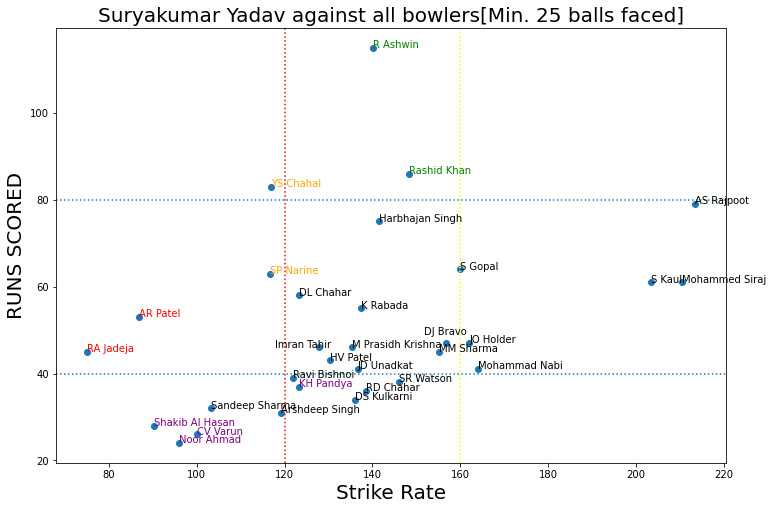

In [335]:
plt.figure(figsize=(12,8))
plt.title('Suryakumar Yadav against all bowlers[Min. 25 balls faced]',fontsize=20)
plt.xlabel('Strike Rate',fontsize=20)
plt.ylabel('RUNS SCORED',fontsize=20)
plt.axvline(120,ls='dotted',color='red')
plt.axvline(160,ls='dotted',color='yellow')
plt.axhline(40,ls='dotted')
plt.axhline(80,ls='dotted')
plt.scatter(surya_agst_bowlers.sr,surya_agst_bowlers.runs_off_bat)
for i in range(len(surya_agst_bowlers)):
    if surya_agst_bowlers['bowler'][i]=='Imran Tahir':
        plt.text(surya_agst_bowlers['sr'][i]-10,surya_agst_bowlers['runs_off_bat'][i],surya_agst_bowlers['bowler'][i])
    elif surya_agst_bowlers['bowler'][i]=='DJ Bravo':
        plt.text(surya_agst_bowlers['sr'][i]-5,surya_agst_bowlers['runs_off_bat'][i]+2,surya_agst_bowlers['bowler'][i])
    elif (surya_agst_bowlers['bowler'][i]=='RA Jadeja')|(surya_agst_bowlers['bowler'][i]=='AR Patel'):
        plt.text(surya_agst_bowlers['sr'][i],surya_agst_bowlers['runs_off_bat'][i],surya_agst_bowlers['bowler'][i],color='red')
    elif (surya_agst_bowlers['bowler'][i]=='SP Narine')|(surya_agst_bowlers['bowler'][i]=='YS Chahal'):
        plt.text(surya_agst_bowlers['sr'][i],surya_agst_bowlers['runs_off_bat'][i],surya_agst_bowlers['bowler'][i],color='orange')
    elif (surya_agst_bowlers['bowler'][i]=='R Ashwin')|(surya_agst_bowlers['bowler'][i]=='Rashid Khan'):
        plt.text(surya_agst_bowlers['sr'][i],surya_agst_bowlers['runs_off_bat'][i],surya_agst_bowlers['bowler'][i],color='green')
    elif (surya_agst_bowlers['bowler'][i]=='CV Varun')|(surya_agst_bowlers['bowler'][i]=='Noor Ahmad')|(surya_agst_bowlers['bowler'][i]=='Shakib Al Hasan')|(surya_agst_bowlers['bowler'][i]=='KH Pandya'):
        plt.text(surya_agst_bowlers['sr'][i],surya_agst_bowlers['runs_off_bat'][i],surya_agst_bowlers['bowler'][i],color='purple')    
    else:    
        plt.text(surya_agst_bowlers['sr'][i],surya_agst_bowlers['runs_off_bat'][i],surya_agst_bowlers['bowler'][i])
plt.show()

#Conclusions :How Suryakumar Yadav fares against all bowlers
#1.SKY's favourite bowlers feature the likes of: Ankit Rajpoot,Sid Kaul,Mohit Sharma,Jason Holder,DJ Bravo - all medium pacers
#shows how comfortable he is against that type of bowling(SR~200)
#2.His least favourite bowlers are all left arm spinners/mystery spinners:Jadeja,Axar,Shakib,Varun,Noor Ahmad (SR~87)
#3.This shows he has a clear problem against them.He also gets out to them and averages=25.14.
#4.He smashes off spin for fun as is evident:Nabi(SR=164),Harbhajan(SR=141),Ashwin(SR=140) being at top of the pile and has been
#out only once to them.
#5.He has middling returns against Narine(116.6) & Chahal(116.9)
#6.He loves Rashid Khan though (148) placing him 9th amomg the 30 bowlers he has faced for atleast 25 balls.
#7. SKY averages 13 against Ravi Bishnoi,10.67 against Sandeep Sharma and 15 against Jadeja

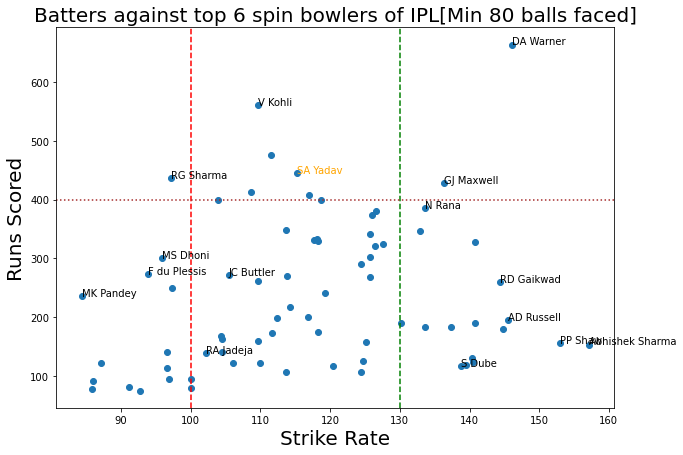

In [336]:
plt.figure(figsize=(10,7))
plt.title('Batters against top 6 spin bowlers of IPL[Min 80 balls faced]',fontsize=20)
plt.xlabel('Strike Rate',fontsize=20)
plt.ylabel('Runs Scored',fontsize=20)
plt.axvline(100,ls='dashed',color='red')
plt.axvline(130,ls='dashed',color='green')
plt.axhline(400,ls='dotted',color='brown')
plt.scatter(spin_search.sr,spin_search.runs_off_bat)
for i in range(len(spin_search)):
    if (spin_search['striker'][i]=='DA Warner')|(spin_search['striker'][i]=='PP Shaw')|(spin_search['striker'][i]=='AD Russell'):
        plt.text(spin_search['sr'][i],spin_search['runs_off_bat'][i],spin_search['striker'][i])
    elif (spin_search['striker'][i]=='V Kohli')| (spin_search['striker'][i]=='GJ Maxwell')|(spin_search['striker'][i]=='RD Gaikwad'):
        plt.text(spin_search['sr'][i],spin_search['runs_off_bat'][i],spin_search['striker'][i])
    elif (spin_search['striker'][i]=='SA Yadav'):
        plt.text(spin_search['sr'][i],spin_search['runs_off_bat'][i],spin_search['striker'][i],color='orange') 
    elif (spin_search['striker'][i]=='N Rana')| (spin_search['striker'][i]=='S Dube')|(spin_search['striker'][i]=='Abhishek Sharma'):
        plt.text(spin_search['sr'][i],spin_search['runs_off_bat'][i],spin_search['striker'][i])   
    elif (spin_search['striker'][i]=='MS Dhoni')| (spin_search['striker'][i]=='F du Plessis')|(spin_search['striker'][i]=='RG Sharma'):
        plt.text(spin_search['sr'][i],spin_search['runs_off_bat'][i],spin_search['striker'][i])
    elif (spin_search['striker'][i]=='RA Jadeja')| (spin_search['striker'][i]=='MK Pandey')|(spin_search['striker'][i]=='JC Buttler'):
        plt.text(spin_search['sr'][i],spin_search['runs_off_bat'][i],spin_search['striker'][i])    
plt.show()

#1.SKY strikes at 115 agaist the top 6 spinners,which places him 39th among the 73 batters to have faced atleast 80 balls from the
#top 6 ipl spinners.
#2.He has got out 7 times to these spinners(386 balls): 3 each to Chahal (71 balls) & Jadeja(60 balls) and once to Axar(61 balls)
#3.Avg agst top6 spinners=55.14
#4.Average seems pretty healthy considering the amount of balls he has faced & the position he comes into (No.3 /4)
#5.David Warner is head & shoulders ahead while facing the cream of the spinners-striking at 146 in 663 deliveries,which 
#probabaly explains his status as one of the most prolific run getters , get through pace up top & feast on spinners.
#6.Rohit Sharma ,MS Dhoni, Faf du Plessis, Manish Pandey the biggest names to strike at less than 100.
#7.Greenhorns Abhishek Sharma,Prithvi Shaw,Ruturaj Gaikwad have taken down spin to great effect.

In [337]:
batters_agst_chahal.head()

,striker,runs_off_bat,ball,sr
0,AD Russell,81,45,180.000000
1,DR Smith,59,33,178.787879
2,Ishan Kishan,55,32,171.875000
3,DA Miller,77,45,171.111111
4,DA Warner,155,97,159.793814


In [338]:
chahal_w.head()

,wicket_type
striker,
MA Agarwal,6
N Rana,6
Q de Kock,6
SV Samson,5
MK Pandey,4


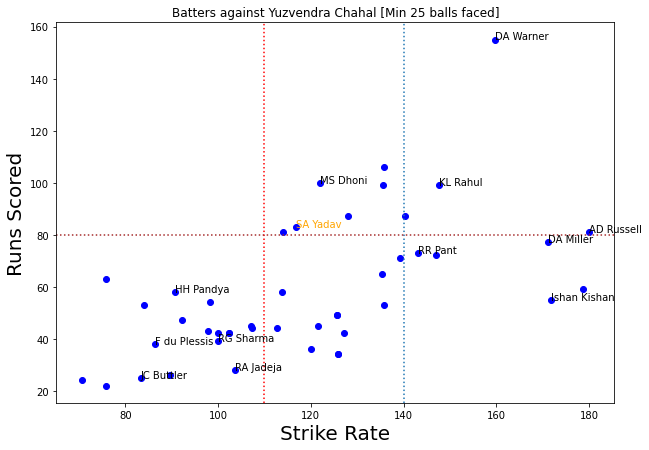

In [339]:
plt.figure(figsize=(10,7))
plt.title('Batters against Yuzvendra Chahal [Min 25 balls faced]')
plt.xlabel('Strike Rate',fontsize=20)
plt.axvline(110,ls='dotted',color='red')
plt.axvline(140,ls='dotted')
plt.axhline(80,ls='dotted',color='brown')
plt.ylabel('Runs Scored',fontsize=20)
plt.scatter(batters_agst_chahal.sr,batters_agst_chahal.runs_off_bat,color='blue')
for i in range(len(batters_agst_chahal)):
    if(batters_agst_chahal['striker'][i]=='DA Miller')|(batters_agst_chahal['striker'][i]=='DA Warner')|(batters_agst_chahal['striker'][i]=='AD Russell'):
        plt.text(batters_agst_chahal['sr'][i],batters_agst_chahal['runs_off_bat'][i],batters_agst_chahal['striker'][i])
    elif(batters_agst_chahal['striker'][i]=='Ishan Kishan')|(batters_agst_chahal['striker'][i]=='RR Pant')|(batters_agst_chahal['striker'][i]=='KL Rahul'):
        plt.text(batters_agst_chahal['sr'][i],batters_agst_chahal['runs_off_bat'][i],batters_agst_chahal['striker'][i])    
    elif(batters_agst_chahal['striker'][i]=='JC Buttler')|(batters_agst_chahal['striker'][i]=='F du Plessis')|(batters_agst_chahal['striker'][i]=='HH Pandya'):
        plt.text(batters_agst_chahal['sr'][i],batters_agst_chahal['runs_off_bat'][i],batters_agst_chahal['striker'][i])    
    elif(batters_agst_chahal['striker'][i]=='DA Miller')|(batters_agst_chahal['striker'][i]=='DA Warner')|(batters_agst_chahal['striker'][i]=='AD Russell'):
        plt.text(batters_agst_chahal['sr'][i],batters_agst_chahal['runs_off_bat'][i],batters_agst_chahal['striker'][i])  
    elif(batters_agst_chahal['striker'][i]=='MS Dhoni')|(batters_agst_chahal['striker'][i]=='RG Sharma')|(batters_agst_chahal['striker'][i]=='RA Jadeja'):
        plt.text(batters_agst_chahal['sr'][i],batters_agst_chahal['runs_off_bat'][i],batters_agst_chahal['striker'][i])    
    elif(batters_agst_chahal['striker'][i]=='SA Yadav'):
        plt.text(batters_agst_chahal['sr'][i],batters_agst_chahal['runs_off_bat'][i],batters_agst_chahal['striker'][i],color='orange')    
plt.show()

#1.Warner like most spinners likes Chahal too(SR=159)(5th best)
#2.Ishan Kishan,Russell,Miller,Pant,KL Rahul all have scored in excess of 140 against Chahal.
#3.SKY strikes at 116.9 against Chahal in 71 balls & has gotten out thrice to him ,SR is middling (23 out of 44) and avg=23.67
#shows Chahal has the wood over him, which is certainly an anomaly for legspinners as he hasn't had much problems against Tahir,
#Rashid,Gopal,Bishnoi.
#4.The section runs>80 & SR<110 is empty % runs>80 & SR<140 has only 6 batsmen which shows once a batter has seen enough of
#Chahal, he plays him comfortably.Probably the reason Chahal is not the threat he once used to be at int'l stage where batters 
#are more accomplished ?
#5.Dekock averages 7.33 against him,Mayank Aggarwal,Nitish Rana averages 13.5-all dismissed 6 times,Samson-8.40 :5 dismissals

In [340]:
batters_agst_jaddu.head()

,striker,runs_off_bat,ball,sr
0,V Sehwag,55,25,220.000000
1,KA Pollard,114,53,215.094340
2,AR Patel,68,39,174.358974
3,DA Warner,101,60,168.333333
4,DA Miller,111,67,165.671642


In [341]:
jaddu_w.head()

,wicket_type
striker,
GJ Maxwell,6
SR Watson,5
SPD Smith,5
KD Karthik,3
MK Tiwary,3


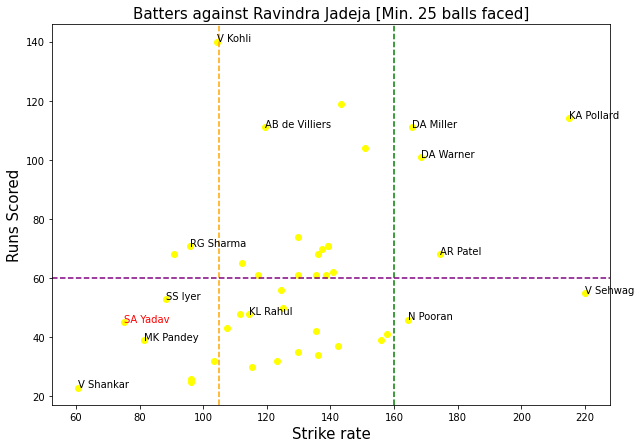

In [342]:
plt.figure(figsize=(10,7))
plt.title('Batters against Ravindra Jadeja [Min. 25 balls faced]',fontsize=15)
plt.xlabel('Strike rate',fontsize=15)
plt.ylabel('Runs Scored',fontsize=15)
plt.axvline(105,color='orange',ls='dashed')
plt.axvline(160,color='green',ls='dashed')
plt.axhline(60,color='purple',ls='dashed')
plt.scatter(batters_agst_jaddu.sr,batters_agst_jaddu.runs_off_bat,color='yellow')
for i in range(len(batters_agst_jaddu)):
    if(batters_agst_jaddu['striker'][i]=='AR Patel')|(batters_agst_jaddu['striker'][i]=='DA Miller')|(batters_agst_jaddu['striker'][i]=='DA Warner'):        
        plt.text(batters_agst_jaddu['sr'][i],batters_agst_jaddu['runs_off_bat'][i],batters_agst_jaddu['striker'][i])
    if(batters_agst_jaddu['striker'][i]=='V Sehwag')|(batters_agst_jaddu['striker'][i]=='KA Pollard')|(batters_agst_jaddu['striker'][i]=='N Pooran'):        
        plt.text(batters_agst_jaddu['sr'][i],batters_agst_jaddu['runs_off_bat'][i],batters_agst_jaddu['striker'][i])    
    if(batters_agst_jaddu['striker'][i]=='SS Iyer')|(batters_agst_jaddu['striker'][i]=='V Shankar')|(batters_agst_jaddu['striker'][i]=='MK Pandey'):        
        plt.text(batters_agst_jaddu['sr'][i],batters_agst_jaddu['runs_off_bat'][i],batters_agst_jaddu['striker'][i])    
    if(batters_agst_jaddu['striker'][i]=='V Kohli')|(batters_agst_jaddu['striker'][i]=='RG Sharma')|(batters_agst_jaddu['striker'][i]=='AB de Villiers'):        
        plt.text(batters_agst_jaddu['sr'][i],batters_agst_jaddu['runs_off_bat'][i],batters_agst_jaddu['striker'][i]) 
    if(batters_agst_jaddu['striker'][i]=='SA Yadav'):
        plt.text(batters_agst_jaddu['sr'][i],batters_agst_jaddu['runs_off_bat'][i],batters_agst_jaddu['striker'][i],color='red')
    if(batters_agst_jaddu['striker'][i]=='KL Rahul'):
        plt.text(batters_agst_jaddu['sr'][i],batters_agst_jaddu['runs_off_bat'][i],batters_agst_jaddu['striker'][i])    
plt.show()

#1.Jadeja's favourite batter to bowl at is defnitely SKY (SR=75,Avg=15).SKY's lowest SR is agst Jadeja and Jadeja vs SKY is the
#second most favourable match up for Jadeja in terms of Economy(after Vijay Shankar)
#2.Unsurprisisngly, southpaws:Warner,Axar,Pooran,Miller all have high SR against him(all above160)
#3.Kohli has faced 134 from Jadeja scoring at 104,only Rohit & Steve Smith have been quieter among those to have faced 60 balls.
#4.Top right handers of the IPL haven't got Jadeja away is the biggest takeway from his bowling analysis and his & his team's
#mantra for success.
#5. His battle against Maxwell has been entertaining 70 runs @137 and 6 dismissals@11.33


In [343]:
batters_agst_axar.head()

,striker,runs_off_bat,ball,sr
0,Yuvraj Singh,63,33,190.909091
1,AD Russell,54,29,186.206897
2,CH Gayle,61,33,184.848485
3,LMP Simmons,46,25,184.000000
4,DA Warner,93,57,163.157895


In [344]:
axar_w.head(5)

,wicket_type
striker,
SR Watson,6
BB McCullum,3
Mandeep Singh,3
AB de Villiers,2
F du Plessis,2


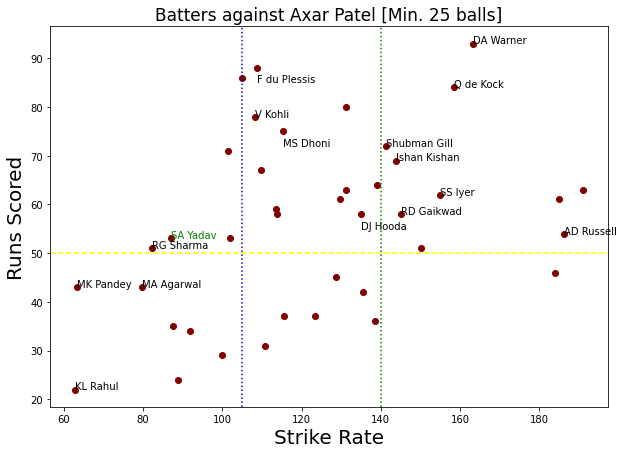

In [345]:
plt.figure(figsize=(10,7))
plt.title('Batters against Axar Patel [Min. 25 balls]',fontsize=17)
plt.axvline(105,ls='dotted',color='blue')
plt.axvline(140,ls='dotted',color='green')
plt.axhline(50,ls='dashed',color='yellow')
plt.xlabel('Strike Rate',fontsize=20)
plt.ylabel('Runs Scored',fontsize=20)
plt.scatter(batters_agst_axar.sr,batters_agst_axar.runs_off_bat,color='maroon')
for i in range(len(batters_agst_axar)):
    if (batters_agst_axar['striker'][i]=='AD Russell')|(batters_agst_axar['striker'][i]=='DA Warner')|(batters_agst_axar['striker'][i]=='Q de Kock'):
        plt.text(batters_agst_axar['sr'][i],batters_agst_axar['runs_off_bat'][i],batters_agst_axar['striker'][i])
    if (batters_agst_axar['striker'][i]=='KL Rahul')|(batters_agst_axar['striker'][i]=='MK Pandey')|(batters_agst_axar['striker'][i]=='RG Sharma'):
        plt.text(batters_agst_axar['sr'][i],batters_agst_axar['runs_off_bat'][i],batters_agst_axar['striker'][i]) 
    if (batters_agst_axar['striker'][i]=='RD Gaikwad')|(batters_agst_axar['striker'][i]=='SS Iyer')|(batters_agst_axar['striker'][i]=='V Kohli'):
        plt.text(batters_agst_axar['sr'][i],batters_agst_axar['runs_off_bat'][i],batters_agst_axar['striker'][i]) 
    if (batters_agst_axar['striker'][i]=='Ishan Kishan')|(batters_agst_axar['striker'][i]=='Shubman Gill')|(batters_agst_axar['striker'][i]=='MA Agarwal'):
        plt.text(batters_agst_axar['sr'][i],batters_agst_axar['runs_off_bat'][i],batters_agst_axar['striker'][i]) 
    if (batters_agst_axar['striker'][i]=='SA Yadav'):
        plt.text(batters_agst_axar['sr'][i],batters_agst_axar['runs_off_bat'][i],batters_agst_axar['striker'][i],color='green')
    if (batters_agst_axar['striker'][i]=='MS Dhoni')|(batters_agst_axar['striker'][i]=='DJ Hooda')|(batters_agst_axar['striker'][i]=='F du Plessis'):
        plt.text(batters_agst_axar['sr'][i],batters_agst_axar['runs_off_bat'][i]-3,batters_agst_axar['striker'][i])    
plt.show()


#1. It's that man again: Warner strikes at 163 against Axar, a big relief for him now that they both play for DC
#2. Russell,Kishan,Gaikwad,Iyer,Shubman all have enjoyed success against Axar (a mix of righties & lefties,very different from Jadeja)
#3. However,one thing is common with Jadeja. Both have kept SKY quiet, Sky has the second lowest SR against Axar.
#4. A noticeable aspect of Axar is batters have who have faced  more than 50 balls off Axar have still not nailed it like they 
#had against Chahal & Jadeja.(batters featuring in this section are Rohit,SKY,Virat,du Plessis & Dhoni among others)
#5. Axar's best 4 bunnies include :Watson,McCullum,Mandeep Singh & AB de Villiers. While 3 of them are legends of the format,
#they are retired and Mandeep Singh is out of favour. He hasn't got any other batter more than twice though. Axar is someone
#who relies on matchups & stifles the batters with his accurate lengths thus creating pressure .

In [346]:
batters_agst_rashid.head()

,striker,runs_off_bat,ball,sr
0,SR Watson,82,47,174.468085
1,CH Gayle,54,33,163.636364
2,RD Gaikwad,95,60,158.333333
3,RV Uthappa,64,41,156.097561
4,SA Yadav,86,58,148.275862


In [347]:
rashid_w.head()

,wicket_type
striker,
S Dhawan,4
RG Sharma,4
MM Ali,4
SK Raina,3
SO Hetmyer,3


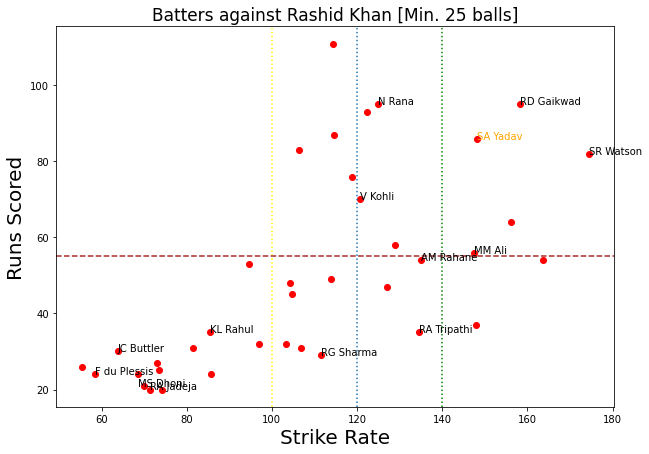

In [348]:
plt.figure(figsize=(10,7))
plt.title('Batters against Rashid Khan [Min. 25 balls]',fontsize=17)
plt.axvline(100,ls='dotted',color='yellow')
plt.axvline(120,ls='dotted')
plt.axvline(140,ls='dotted',color='green')
plt.axhline(55,ls='dashed',color='brown')
plt.xlabel('Strike Rate',fontsize=20)
plt.ylabel('Runs Scored',fontsize=20)
plt.scatter(batters_agst_rashid.sr,batters_agst_rashid.runs_off_bat,color='red')
for i in range(len(batters_agst_rashid)):
    if (batters_agst_rashid['striker'][i]=='SR Watson')|(batters_agst_rashid['striker'][i]=='RD Gaikwad')|(batters_agst_rashid['striker'][i]=='MM Ali'):
        plt.text(batters_agst_rashid['sr'][i],batters_agst_rashid['runs_off_bat'][i],batters_agst_rashid['striker'][i])
    if (batters_agst_rashid['striker'][i]=='AM Rahane')|(batters_agst_rashid['striker'][i]=='N Rana')|(batters_agst_rashid['striker'][i]=='V Kohli'):
        plt.text(batters_agst_rashid['sr'][i],batters_agst_rashid['runs_off_bat'][i],batters_agst_rashid['striker'][i])    
    if (batters_agst_rashid['striker'][i]=='F du Plessis')|(batters_agst_rashid['striker'][i]=='JC Buttler')|(batters_agst_rashid['striker'][i]=='RA Jadeja'):
        plt.text(batters_agst_rashid['sr'][i],batters_agst_rashid['runs_off_bat'][i],batters_agst_rashid['striker'][i])    
    if (batters_agst_rashid['striker'][i]=='RG Sharma')|(batters_agst_rashid['striker'][i]=='KL Rahul')|(batters_agst_rashid['striker'][i]=='RA Tripathi'):
        plt.text(batters_agst_rashid['sr'][i],batters_agst_rashid['runs_off_bat'][i],batters_agst_rashid['striker'][i])
    if (batters_agst_rashid['striker'][i]=='MS Dhoni'):
        plt.text(batters_agst_rashid['sr'][i],batters_agst_rashid['runs_off_bat'][i]-3,batters_agst_rashid['striker'][i]) 
    if (batters_agst_rashid['striker'][i]=='SA Yadav'):
        plt.text(batters_agst_rashid['sr'][i],batters_agst_rashid['runs_off_bat'][i],batters_agst_rashid['striker'][i],color='orange')     
plt.show()

#1.only 14 batters have managed to keep a strike rate of more than 120 against rashid, speaks volumes about how miserly he is.
#2.There is a case of him bowling exclusively at the death against CSK. Rahane,Ruturaj,Moeen all strike north of 135 against him
#.However, MS Dhoni & Jadeja both strike below 72 against him.
#3.SKY has enjoyed him a lot striking at 148 which shows his value in the MI set-up as Rohit & Ishan both struggle against him
# & even past players of MI in Pollard,de Kock, Pandya brothers all have a strike rate less than 105 against him.
#4.Sanju Samson,Kohli , N Rana are not bad players of spin but despite having played Rashid a lot in the past have a low Strike rate.
#5. Everyone who has a strike rate greater than 130 against Rashid bats in the Top 3 ,which shows 2 things,he is not a PP bowler
#& set batters have it relatively easy against him considering all these players have already played atleast 15-20 balls before
#Rashid comes on.
#6.There is a case for him to start the innings against MI . Rohit averages 7.25 against him getting out 4 times, Ishan Kishan 
#as well strikes at just 116 against him and has got out twice.


In [349]:
batters_agst_narine

,striker,runs_off_bat,ball,sr
0,DA Warner,195,127,153.543307
1,HH Pandya,69,46,150.000000
2,KL Rahul,105,70,150.000000
3,RA Tripathi,71,48,147.916667
4,PP Shaw,47,32,146.875000
5,JP Duminy,60,41,146.341463
6,Ishan Kishan,38,26,146.153846
7,RD Gaikwad,55,39,141.025641
8,Mandeep Singh,58,43,134.883721
9,DA Miller,51,38,134.210526


In [350]:
narine_w.head(5)

,wicket_type
striker,
RG Sharma,7
SR Watson,5
AM Rahane,4
AT Rayudu,4
AB de Villiers,4


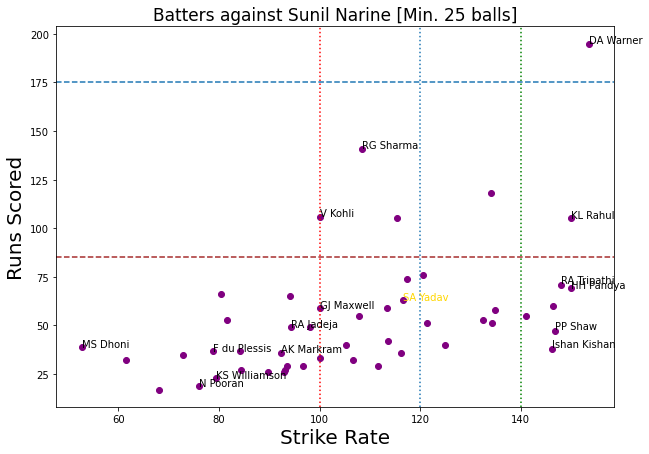

In [351]:
plt.figure(figsize=(10,7))
plt.title('Batters against Sunil Narine [Min. 25 balls]',fontsize=17)
plt.axvline(100,ls='dotted',color='red')
plt.axvline(120,ls='dotted')
plt.axvline(140,ls='dotted',color='green')
plt.axhline(85,ls='dashed',color='brown')
plt.axhline(175,ls='dashed')
plt.xlabel('Strike Rate',fontsize=20)
plt.ylabel('Runs Scored',fontsize=20)
plt.scatter(batters_agst_narine.sr,batters_agst_narine.runs_off_bat,color='purple')
for i in range(len(batters_agst_narine)):
    if (batters_agst_narine['striker'][i]=='DA Warner')|(batters_agst_narine['striker'][i]=='HH Pandya')|(batters_agst_narine['striker'][i]=='KL Rahul'):
        plt.text(batters_agst_narine['sr'][i],batters_agst_narine['runs_off_bat'][i],batters_agst_narine['striker'][i]) 
    if (batters_agst_narine['striker'][i]=='MS Dhoni')|(batters_agst_narine['striker'][i]=='RG Sharma')|(batters_agst_narine['striker'][i]=='V Kohli'):
        plt.text(batters_agst_narine['sr'][i],batters_agst_narine['runs_off_bat'][i],batters_agst_narine['striker'][i])     
    if (batters_agst_narine['striker'][i]=='RA Tripathi')|(batters_agst_narine['striker'][i]=='PP Shaw')|(batters_agst_narine['striker'][i]=='Ishan Kishan'):
        plt.text(batters_agst_narine['sr'][i],batters_agst_narine['runs_off_bat'][i]+1,batters_agst_narine['striker'][i])
    if (batters_agst_narine['striker'][i]=='F du Plessis')|(batters_agst_narine['striker'][i]=='N Pooran')|(batters_agst_narine['striker'][i]=='KS Williamson'):
        plt.text(batters_agst_narine['sr'][i],batters_agst_narine['runs_off_bat'][i],batters_agst_narine['striker'][i])   
    if (batters_agst_narine['striker'][i]=='RA Jadeja')|(batters_agst_narine['striker'][i]=='GJ Maxwell')|(batters_agst_narine['striker'][i]=='AK Markram'):
        plt.text(batters_agst_narine['sr'][i],batters_agst_narine['runs_off_bat'][i],batters_agst_narine['striker'][i])  
    if (batters_agst_narine['striker'][i]=='SA Yadav'):
        plt.text(batters_agst_narine['sr'][i],batters_agst_narine['runs_off_bat'][i],batters_agst_narine['striker'][i],color='gold')     
plt.show()    



#1. David Warner is a beast against spin ,but he is on an another level against Narine , having scored close to 200 runs @153.
#2. Very similar to Rashid in being economical, only 15 batters have a SR more than 120 against him.
#3. Barring Warner & KL Rahul, there is no one to have faced so much of Narine and managed to score at a decent SR.
#4. SKY ranks 16th among 48 batters and still has a SR of 116.6, showing how despite his form & action struggles over the years,
#he constantly reinvents himself.
#5. Long list of key batters who struggle against him: Dhoni, Yuvraj,Pooran,Samson,Williamson,du Plessis.
#6. Narine has got out Rohit 7 times in 130 balls but the downside of starting with him against MI is that Ishan Kishan likes to
#score off him (SR~146) and gotten out just once.

In [352]:
ashwin_w.head()

,wicket_type
striker,
RV Uthappa,7
AM Rahane,6
AT Rayudu,5
CH Gayle,5
PA Patel,4


In [353]:
batters_agst_ashwin.head(5)

,striker,runs_off_bat,ball,sr
0,N Rana,108,60,180.000000
1,GJ Maxwell,140,78,179.487179
2,MS Bisla,52,29,179.310345
3,MA Agarwal,71,44,161.363636
4,Shubman Gill,95,61,155.737705


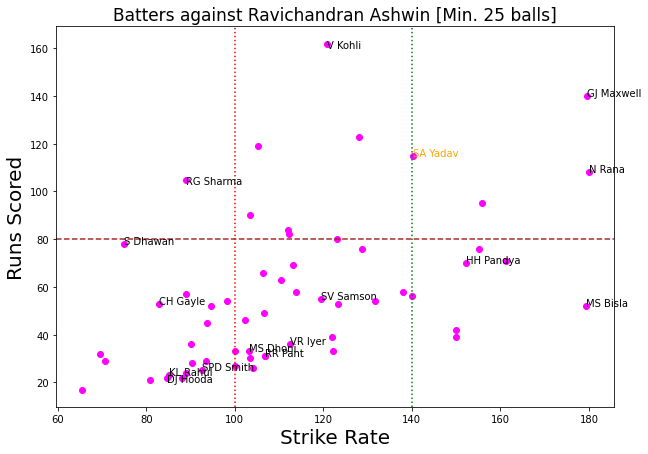

In [354]:
plt.figure(figsize=(10,7))
plt.title('Batters against Ravichandran Ashwin [Min. 25 balls]',fontsize=17)
plt.axvline(100,ls='dotted',color='red')
plt.axvline(140,ls='dotted',color='green')
plt.axhline(80,ls='dashed',color='brown')
#plt.axhline(175,ls='dashed')
plt.xlabel('Strike Rate',fontsize=20)
plt.ylabel('Runs Scored',fontsize=20)
plt.scatter(batters_agst_ashwin.sr,batters_agst_ashwin.runs_off_bat,color='magenta')
for i in range(len(batters_agst_ashwin)):
    if (batters_agst_ashwin['striker'][i]=='N Rana')|(batters_agst_ashwin['striker'][i]=='GJ Maxwell')|(batters_agst_ashwin['striker'][i]=='MS Bisla'):
        plt.text(batters_agst_ashwin['sr'][i],batters_agst_ashwin['runs_off_bat'][i],batters_agst_ashwin['striker'][i])
    if (batters_agst_ashwin['striker'][i]=='CH Gayle')|(batters_agst_ashwin['striker'][i]=='KL Rahul')|(batters_agst_ashwin['striker'][i]=='S Dhawan'):
        plt.text(batters_agst_ashwin['sr'][i],batters_agst_ashwin['runs_off_bat'][i],batters_agst_ashwin['striker'][i])
    if (batters_agst_ashwin['striker'][i]=='RG Sharma')|(batters_agst_ashwin['striker'][i]=='V Kohli')|(batters_agst_ashwin['striker'][i]=='DJ Hooda'):
        plt.text(batters_agst_ashwin['sr'][i],batters_agst_ashwin['runs_off_bat'][i]-2,batters_agst_ashwin['striker'][i])
    if (batters_agst_ashwin['striker'][i]=='MS Dhoni')|(batters_agst_ashwin['striker'][i]=='RR Pant')|(batters_agst_ashwin['striker'][i]=='HH Pandya'):   
        plt.text(batters_agst_ashwin['sr'][i],batters_agst_ashwin['runs_off_bat'][i],batters_agst_ashwin['striker'][i])    
    if (batters_agst_ashwin['striker'][i]=='SV Samson')|(batters_agst_ashwin['striker'][i]=='VR Iyer')|(batters_agst_ashwin['striker'][i]=='SPD Smith'):
        plt.text(batters_agst_ashwin['sr'][i],batters_agst_ashwin['runs_off_bat'][i],batters_agst_ashwin['striker'][i])
    if (batters_agst_ashwin['striker'][i]=='SA Yadav'):
        plt.text(batters_agst_ashwin['sr'][i],batters_agst_ashwin['runs_off_bat'][i],batters_agst_ashwin['striker'][i],color='orange')    
plt.show()


#1. Contrary to popular belief, Ashwin has got lefties & righties alike ,hasn't shown much bias.
#2. Dhawan, KL Rahul,Rohit,Hooda, Pant, Dhoni all have played him a lot in India nets and yet struggle to score against him.
#3. SKY on the other hand has scored in excess of 140 against him.
#4. Gotten out Rahane 6 times @ 8.17
#5. All batters who get out to him often tend not to take risks


In [355]:
rashid_w=rashid_df[rashid_df['wicket_type'].isin(outs)]
jaddu_w=jaddu_df[jaddu_df['wicket_type'].isin(outs)]
ashwin_w=ashwin_df[ashwin_df['wicket_type'].isin(outs)]
narine_w=narine_df[narine_df['wicket_type'].isin(outs)]
axar_w=axar_df[axar_df['wicket_type'].isin(outs)]
chahal_w=chahal_df[chahal_df['wicket_type'].isin(outs)]

In [356]:
rashid_w=pd.DataFrame(rashid_w.groupby(['striker'])['wicket_type'].count())

In [357]:
jaddu_w=pd.DataFrame(jaddu_w.groupby(['striker'])['wicket_type'].count())
ashwin_w=pd.DataFrame(ashwin_w.groupby(['striker'])['wicket_type'].count())
narine_w=pd.DataFrame(narine_w.groupby(['striker'])['wicket_type'].count())
axar_w=pd.DataFrame(axar_w.groupby(['striker'])['wicket_type'].count())
chahal_w=pd.DataFrame(chahal_w.groupby(['striker'])['wicket_type'].count())

In [358]:
rashid_w.sort_values(by='wicket_type',ascending=False,inplace=True)
jaddu_w.sort_values(by='wicket_type',ascending=False,inplace=True)
ashwin_w.sort_values(by='wicket_type',ascending=False,inplace=True)
narine_w.sort_values(by='wicket_type',ascending=False,inplace=True)
axar_w.sort_values(by='wicket_type',ascending=False,inplace=True)
chahal_w.sort_values(by='wicket_type',ascending=False,inplace=True)

In [359]:
#who are the bunnies ? who belts them around the park ?
#Analyzing how the top 6 spinners fare against all the batters 

In [360]:
rashid_w.head()

,wicket_type
striker,
S Dhawan,4
RG Sharma,4
MM Ali,4
SK Raina,3
SO Hetmyer,3


In [361]:
jaddu_w.head()

,wicket_type
striker,
GJ Maxwell,6
SR Watson,5
SPD Smith,5
KD Karthik,3
MK Tiwary,3


In [362]:
left_and_mystery=['RA Jadeja','AR Patel','KH Pandya','Abhishek Sharma','Shakib Al Hasan','Harpreet Brar','Shahbaz Ahmed',
                  'CV Varun',
             'Noor Ahmad','M Theekshana','SP Narine','S Nadeem']
#the 12 left arm spinners and mystery spinners of the current ipl teams.

In [363]:
len(left_and_mystery)

12

In [364]:
surya_prob=df[(df['striker']=='SA Yadav') &(df['bowler'].isin(left_and_mystery))]

In [365]:
surya_prob.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
243554,1370352,2023,2023-05-26,"Narendra Modi Stadium, Ahmedabad",2,10.8,Mumbai Indians,Gujarat Titans,SA Yadav,C Green,Noor Ahmad,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243561,1370352,2023,2023-05-26,"Narendra Modi Stadium, Ahmedabad",2,12.1,Mumbai Indians,Gujarat Titans,SA Yadav,Vishnu Vinod,Noor Ahmad,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243562,1370352,2023,2023-05-26,"Narendra Modi Stadium, Ahmedabad",2,12.2,Mumbai Indians,Gujarat Titans,SA Yadav,Vishnu Vinod,Noor Ahmad,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243565,1370352,2023,2023-05-26,"Narendra Modi Stadium, Ahmedabad",2,12.5,Mumbai Indians,Gujarat Titans,SA Yadav,Vishnu Vinod,Noor Ahmad,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243566,1370352,2023,2023-05-26,"Narendra Modi Stadium, Ahmedabad",2,12.6,Mumbai Indians,Gujarat Titans,SA Yadav,Vishnu Vinod,Noor Ahmad,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [366]:
surya_prob_runs=surya_prob['runs_off_bat'].sum()
surya_prob_balls=len(surya_prob)
surya_prob_runs,surya_prob_balls

(341, 332)

In [367]:
surya_prob_sr=100*(surya_prob_runs/surya_prob_balls)
surya_prob_sr

102.71084337349396

In [368]:
pd.DataFrame(surya_prob.groupby(['bowler'])['runs_off_bat'].sum())
#runs sky has scored against left arm spin/mystery spin

,runs_off_bat
bowler,
AR Patel,53
Abhishek Sharma,0
CV Varun,26
Harpreet Brar,8
KH Pandya,37
M Theekshana,16
Noor Ahmad,24
RA Jadeja,45
S Nadeem,23


In [369]:
pd.DataFrame(surya_prob.groupby(['bowler'])['ball'].count())

,ball
bowler,
AR Patel,61
Abhishek Sharma,2
CV Varun,26
Harpreet Brar,6
KH Pandya,30
M Theekshana,13
Noor Ahmad,25
RA Jadeja,60
S Nadeem,14


In [370]:
pd.DataFrame(surya_prob.groupby(['bowler'])['wicket_type'].count())
#how often has he got out to left arm spin/mystery spin

,wicket_type
bowler,
AR Patel,2
Abhishek Sharma,0
CV Varun,1
Harpreet Brar,0
KH Pandya,0
M Theekshana,0
Noor Ahmad,1
RA Jadeja,3
S Nadeem,1


In [371]:
surya_prob_df=pd.DataFrame(surya_prob.groupby(['bowler'])['runs_off_bat'].sum()).merge(pd.DataFrame(surya_prob.groupby(['bowler'])['ball'].count()),on='bowler')

In [372]:
surya_prob_df=surya_prob_df.merge(pd.DataFrame(surya_prob.groupby(['bowler'])['wicket_type'].count()),on='bowler')

In [373]:
surya_prob_df=surya_prob_df.rename(columns={'ball':'balls_faced','wicket_type':'dismissed'})

In [374]:
surya_prob_df['sr']=100*(surya_prob_df['runs_off_bat']/surya_prob_df['balls_faced'])

In [375]:
surya_prob_df
#dataframe highlighting SKY against the left armers/mystery spinners

,runs_off_bat,balls_faced,dismissed,sr
bowler,,,,
AR Patel,53,61,2,86.885246
Abhishek Sharma,0,2,0,0.000000
CV Varun,26,26,1,100.000000
Harpreet Brar,8,6,0,133.333333
KH Pandya,37,30,0,123.333333
M Theekshana,16,13,0,123.076923
Noor Ahmad,24,25,1,96.000000
RA Jadeja,45,60,3,75.000000
S Nadeem,23,14,1,164.285714


In [376]:
surya_prob_df.loc['TOTAL']=[sum(surya_prob_df['runs_off_bat']),sum(surya_prob_df['balls_faced']),sum(surya_prob_df['dismissed']),100*(sum(surya_prob_df['runs_off_bat'])/sum(surya_prob_df['balls_faced']))]

In [377]:
not_surya_prob=df[(df['striker']!='SA Yadav') & (df['bowler'].isin(left_and_mystery)) & (df['season'].isin(year))]

In [378]:
not_surya_prob_df=pd.DataFrame(not_surya_prob.groupby(['bowler'])['runs_off_bat'].sum()).merge(pd.DataFrame(not_surya_prob.groupby(['bowler'])['ball'].count()),on='bowler')

In [379]:
x1=df[(df['striker']!='SA Yadav') & (df['bowler'].isin(left_and_mystery)) & (df['season'].isin(year)) & (df['wicket_type'].isin(outs))]

In [380]:
x1

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
94701,729279,2014,2014-04-16,Sheikh Zayed Stadium,2,4.4,Mumbai Indians,Kolkata Knight Riders,MEK Hussey,AP Tare,SP Narine,0,0,NaN,NaN,NaN,NaN,NaN,bowled,MEK Hussey,NaN,NaN
94720,729279,2014,2014-04-16,Sheikh Zayed Stadium,2,7.5,Mumbai Indians,Kolkata Knight Riders,AP Tare,AT Rayudu,Shakib Al Hasan,0,0,NaN,NaN,NaN,NaN,NaN,caught and bowled,AP Tare,NaN,NaN
94770,729279,2014,2014-04-16,Sheikh Zayed Stadium,2,16.1,Mumbai Indians,Kolkata Knight Riders,AT Rayudu,KA Pollard,SP Narine,0,0,NaN,NaN,NaN,NaN,NaN,stumped,AT Rayudu,NaN,NaN
94783,729279,2014,2014-04-16,Sheikh Zayed Stadium,2,18.1,Mumbai Indians,Kolkata Knight Riders,CJ Anderson,KA Pollard,SP Narine,0,0,NaN,NaN,NaN,NaN,NaN,bowled,CJ Anderson,NaN,NaN
94785,729279,2014,2014-04-16,Sheikh Zayed Stadium,2,18.3,Mumbai Indians,Kolkata Knight Riders,Harbhajan Singh,KA Pollard,SP Narine,0,0,NaN,NaN,NaN,NaN,NaN,bowled,Harbhajan Singh,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243079,1370350,2023,2023-05-23,"MA Chidambaram Stadium, Chepauk, Chennai",2,12.5,Gujarat Titans,Chennai Super Kings,DA Miller,Shubman Gill,RA Jadeja,0,0,NaN,NaN,NaN,NaN,NaN,bowled,DA Miller,NaN,NaN
243092,1370350,2023,2023-05-23,"MA Chidambaram Stadium, Chepauk, Chennai",2,14.3,Gujarat Titans,Chennai Super Kings,R Tewatia,V Shankar,M Theekshana,0,0,NaN,NaN,NaN,NaN,NaN,bowled,R Tewatia,NaN,NaN
243642,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,6.6,Gujarat Titans,Chennai Super Kings,Shubman Gill,WP Saha,RA Jadeja,0,0,NaN,NaN,NaN,NaN,NaN,stumped,Shubman Gill,NaN,NaN
243763,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",2,6.3,Chennai Super Kings,Gujarat Titans,RD Gaikwad,DP Conway,Noor Ahmad,0,0,NaN,NaN,NaN,NaN,NaN,caught,RD Gaikwad,NaN,NaN


In [381]:
x1=pd.DataFrame(x1.groupby(['bowler'])['wicket_type'].count())

In [382]:
not_surya_prob_df=not_surya_prob_df.merge(x1,on='bowler')

In [383]:
not_surya_prob_df['sr']=100*(not_surya_prob_df['runs_off_bat']/not_surya_prob_df['ball'])

In [384]:
not_surya_prob_df
#dataframe showing how all batters have performed against the left armers/mystery spinners

,runs_off_bat,ball,wicket_type,sr
bowler,,,,
AR Patel,3312,2820,111,117.446809
Abhishek Sharma,329,234,9,140.598291
CV Varun,1542,1289,61,119.627618
Harpreet Brar,570,456,18,125.000000
KH Pandya,2246,1948,70,115.297741
M Theekshana,630,497,23,126.760563
Noor Ahmad,329,274,15,120.072993
RA Jadeja,3326,2654,110,125.320271
S Nadeem,1021,773,26,132.082794


In [385]:
not_surya_prob_df.loc['TOTAL']=[sum(not_surya_prob_df['runs_off_bat']),sum(not_surya_prob_df['ball']),sum(not_surya_prob_df['wicket_type']),100*(sum(not_surya_prob_df['runs_off_bat'])/sum(not_surya_prob_df['ball']))]

In [386]:
total_surya_prob=np.array(surya_prob_df.loc['TOTAL'],dtype='int32')
total_surya_prob

array([341, 332,   9, 102])

In [387]:
total_surya_prob

array([341, 332,   9, 102])

In [388]:
total_not_surya_prob=np.array(not_surya_prob_df.loc['TOTAL'],dtype='int32')

In [389]:
total_surya_prob,total_not_surya_prob

(array([341, 332,   9, 102]), array([18649, 15467,   613,   120]))

In [390]:
#FINAL CONCLUSION: 

#these 2 dataframes clearly show how slow SKY has been against left arm spin & mystery spin.
#He has scored only 341 runs ,got out 8 times to the 12 current left arm spinners /mystery spinners for an average of 42.63
#and a  paltry strike rate of 102.71.
#For all batters not named SKY in this period(2014-2023), the corresponding Average & Strike Rate is 30.49 and 120.61 
#respectively
#what has been noticeable that despite not being comfortable against this type of bowling, he has managed to hang on 
#Barring Jadeja who has dismissed him thrice, the remaining 11 bowlers have collectively got him out only on 5 occassions in 262
#balls.
#He manages to get through this difficuilt period against the spinners and feasts on the quicker bowlers & even off-spinners
#of which there are very few to have troubled him.His carrer strike rate of 143.57 clearly illustrates the treatment meted out
#to the other bowlers.